In [291]:
#Analyzing WorkPlaceSatisfactionSurveyData for our project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert

%matplotlib inline

In [292]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

## See if there's any missing values

In [293]:
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

## Investigating a couple categorical/qualitative variables and generating frequency tables for them (Family, Education)

In [294]:
df_education=pd.crosstab(df['education'], 'Count')
df_education.index=['Primary School', 'Secondary School', 'Bachelor Level', 'Master Level']
df_education['%'] = df_education['Count'] / df_education['Count'].sum() * 100
df_education.columns.name=''
df_education.loc['Total'] = df_education[['Count', '%']].sum()
df_education['Count'] = df_education['Count'].astype(int)
df_education.round(decimals=1)

,Count,%
Primary School,27,33.3
Secondary School,30,37.0
Bachelor Level,22,27.2
Master Level,2,2.5
Total,81,100.0


In [295]:
df_yearsofservice=pd.crosstab(df['years_of_service'], 'Count')
df_yearsofservice

bins = [0, 10, 20, 30, 40]
df['yearsofservice_class'] = pd.cut(df['years_of_service'], bins = bins)

In [296]:
df_yearsofservice = pd.crosstab(df['yearsofservice_class'], 'Count')
df_yearsofservice.columns.name = ''
n = df_yearsofservice['Count'].sum()
df_yearsofservice['%'] = df_yearsofservice / n * 100
df_yearsofservice.loc['Total'] = df_yearsofservice[['Count', '%']].sum()
df_yearsofservice['Count'] = df_yearsofservice['Count'].astype(int)
df_yearsofservice.round(decimals=1)

,Count,%
yearsofservice_class,,
"(0, 10]",34,44.7
"(10, 20]",26,34.2
"(20, 30]",14,18.4
"(30, 40]",2,2.6
Total,76,100.0


## Drawing graphs and histograms based on the frequency tables

<Axes: title={'center': 'Education Level'}, ylabel='Count'>

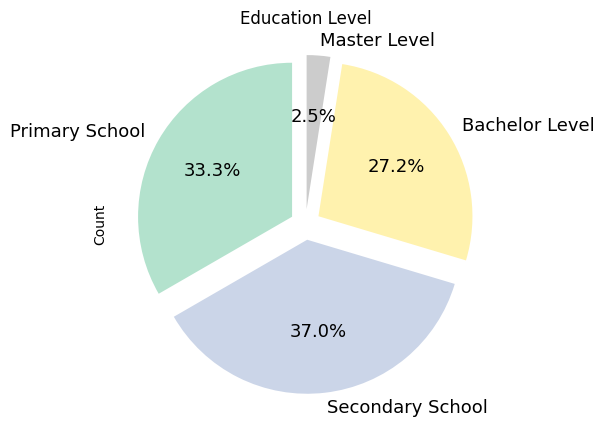

In [297]:
df_education_filtered = df_education[:-1]  #Removes the Total row

kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1, 0.1, 0.1, 0.1),
    figsize    = (6, 5), 
    autopct    = '%1.1f%%',
    title      = 'Education Level'
)

df_education_filtered['Count'].plot.pie(**kwargs)

Text(0, 0.5, 'Count, n=76')

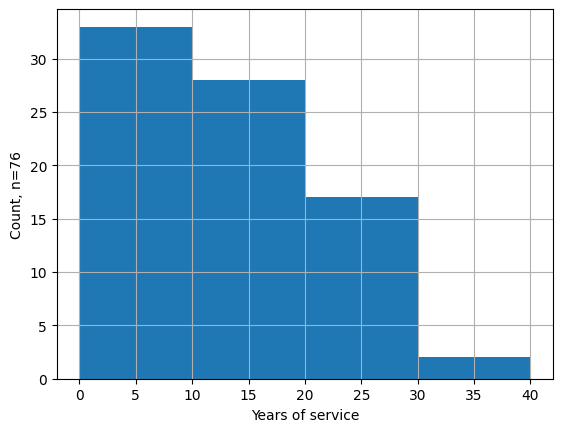

In [298]:
bins = [0, 10, 20, 30, 40]
df['years_of_service'].hist(bins = bins)

plt.xlabel('Years of service')
plt.ylabel('Count, n=' + str(n))

## Let's investigate satisfaction with management


In [299]:
df_satmanagement=pd.crosstab(df['sat_management'], 'Count')
df_satmanagement.index=['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
df_satmanagement.columns.name='Satisfaction with management'
df_satmanagement.loc['Total'] = df_education[['Count']].sum()
df_satmanagement

Satisfaction with management,Count
Very unsatisfied,7
Unsatisfied,16
Neutral,30
Satisfied,23
Very satisfied,6
Total,162


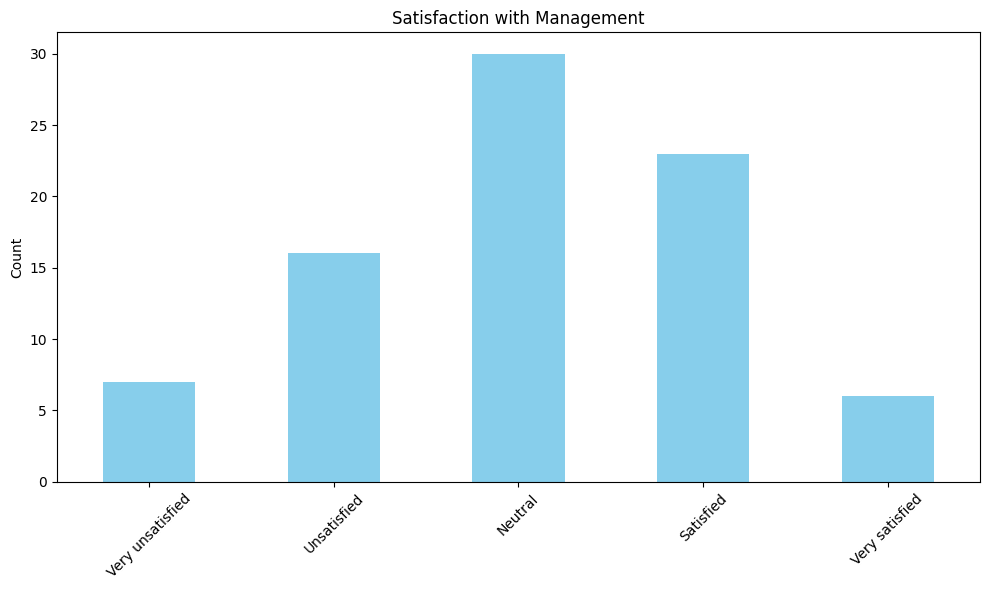

In [300]:
plt.figure(figsize=(10, 6))
df_satmanagement[:-1]['Count'].plot(kind='bar', color='skyblue')

plt.title('Satisfaction with Management')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()